In [202]:
# import numpy library as np 
import numpy as np 
# import pandas library as pd 
import pandas as pd 
# import matplotlib.pyplot library as plt 
import matplotlib.pyplot as plt
#pip install plotnine --user
## https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-altering-colors.html
##
import os
import plotnine as pltnine
from plotnine import *

%matplotlib inline
from IPython.display import display, HTML


## Overview
For this lesson, we will be using the ISS DH Monitoring Evaluation Check_List data, a subset of the data. The main obbjective will be

    Read in CSV data
    Subset dataframes
    Plot bar graph with percentage labels
    Multiple responses on a single question

## Read in CSV data
We read in a `CSV` file of the ISS DQA into a data frame. A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. Similar to data frame in R

In [203]:
#read in the  ISS data
iss_df = pd.read_csv("ISS_DH_Monitoring_Evaluation_Check_List.csv")
iss_df.head()

,front_ISS,facility_identification:S0_04,facility_identification:S0_05,facility_identification:country,facility_identification:province,facility_identification:district,facility_identification:sub_district,facility_identification:sector,facility_identification:facility,facility_identification:S0_12,...,store_gps:Latitude,store_gps:Longitude,store_gps:Altitude,store_gps:Accuracy,Supervisor_name,Supervisor_signature,Supervisedstaff_name,interviewee_signature,S0_109,meta:instanceID
0,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,North,Musanze District,Ruhengeri Sub District,Muhoza,Ruhengeri PH,public,...,-1.508370,29.637844,1821.0,4.551,MUREBWAYIRE Adele,http://197.243.37.250:8080/ODKAggregate/view/b...,Nkuriyingoma Theoneste\nZigirinshuti Ambroise,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-14 00:00:00.0,uuid:00d2734a-6405-46db-be63-32a71e6de2e0
1,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,West,Rubavu District,Gisenyi Sub District,Gisenyi,Gisenyi DH,public,...,-1.702022,29.262377,1460.0,4.551,NGEHOGUHORA Ildephonse,http://197.243.37.250:8080/ODKAggregate/view/b...,KANEZA Narcisse,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-12 00:00:00.0,uuid:10ac474e-d5fc-4c61-bed5-2c36b9fe78b9
2,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,South,Kamonyi District,Remera Rukoma Sub District,Rukoma,Remera Rukoma DH,faith_based,...,-1.938751,29.909924,1821.0,4.551,GASAMAGERA Jean Claude,http://197.243.37.250:8080/ODKAggregate/view/b...,BYIRINGIRO Vedaste Data Manager,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-14 00:00:00.0,uuid:50005fa7-5b75-42bf-8dba-8ad68914b705
3,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,East,Rwamagana District,Rwamagana Sub District,Kigabiro,Rwamagana PH,public,...,-1.950170,30.432953,1540.0,4.551,Cyusa A nicer and Louise Kayiranga,http://197.243.37.250:8080/ODKAggregate/view/b...,Mukamanzi Barbara,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-12 00:00:00.0,uuid:f99cec18-6e46-480b-9aa4-bbfed5f3adbf
4,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,East,Gatsibo District,Kiziguro Sub District,Kiziguro,Kiziguro DH,faith_based,...,-1.765341,30.384958,1557.0,4.551,Rudasingwa Silas,http://197.243.37.250:8080/ODKAggregate/view/b...,UWAMBAJIMANA Emmanuel,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-12 00:00:00.0,uuid:aad39eea-7756-4d6c-8b69-4370d641f743


In [204]:
## display the format of the variables
iss_df.dtypes

front_ISS                           float64
facility_identification:S0_04        object
facility_identification:S0_05        object
facility_identification:country      object
facility_identification:province     object
                                     ...   
Supervisor_signature                 object
Supervisedstaff_name                 object
interviewee_signature                object
S0_109                               object
meta:instanceID                      object
Length: 89, dtype: object

## Subset dataframes
There are different ways of subseting data frames. Here we cover three different ways
   1) Subset by a variable location or name. 
   2) Subset rows that meet a a given criteria i.e. selecting data from a given province. 
   3) Subset variables that have a given string.
   
### Subset by a variable position or name. 
Select multiple columns with specific names or column position. First we select variables with their names using `[[var_name]]` then using their location. We can either use `iloc` or `loc`. `loc` is variable name-based, which means that you have to specify rows and columns based on their row and column name. `iloc` is integer index based, so you have to specify rows and columns by their integer index like you did in the __Data wrangling tutorial - Python__ exercise. 

In [205]:
## check th variable names 
cols = iss_df.columns
cols

Index(['front_ISS', 'facility_identification:S0_04',
       'facility_identification:S0_05', 'facility_identification:country',
       'facility_identification:province', 'facility_identification:district',
       'facility_identification:sub_district',
       'facility_identification:sector', 'facility_identification:facility',
       'facility_identification:S0_12', 'facility_identification:S0_13',
       'monitoring_evaluation:S0_16',
       'monitoring_evaluation:ifpartiallyMEteam',
       'monitoring_evaluation:ifnoActionTaken0',
       'monitoring_evaluation:ifnoMEteam',
       'monitoring_evaluation:ifnoActionTaken1', 'monitoring_evaluation:S0_21',
       'monitoring_evaluation:ifnolastISSreports',
       'monitoring_evaluation:ifnoActionTaken2',
       'monitoring_evaluation:ifpartiallylastISSreports',
       'monitoring_evaluation:ifnoActionTaken3', 'monitoring_evaluation:S0_26',
       'monitoring_evaluation:ifnosubmissioninrhmis',
       'monitoring_evaluation:ifnoActionTake

In [206]:
## subset using name 
## Selecting province ,facility identification ,  S0_73 and  S0_77
iss_df_sub1 = iss_df[['facility_identification:S0_04','facility_identification:province','monitoring_evaluation2:S0_73',
   'monitoring_evaluation3:S0_77']]
iss_df_sub1.head()

,facility_identification:S0_04,facility_identification:province,monitoring_evaluation2:S0_73,monitoring_evaluation3:S0_77
0,aggree,North,Patient_registration OPD Billing IPD Laborator...,8
1,aggree,West,Patient_registration Billing OPD IPD Laborator...,33
2,aggree,South,OPD Billing Laboratory Pharmacy HIV Patient_re...,4
3,aggree,East,NaN,16
4,aggree,East,OPD HIV Laboratory Patient_registration Pharma...,3


In [207]:
## Subset using location
## #Select columns in positions 1 to 5  (first column is 0).
## if you put the numbers before the colon it will select the rows
## iss_df.iloc[0:5 ,: ]
iss_df_sub2 = iss_df.iloc[:, 0:5]
iss_df_sub2.head()

,front_ISS,facility_identification:S0_04,facility_identification:S0_05,facility_identification:country,facility_identification:province
0,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,North
1,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,West
2,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,South
3,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,East
4,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,East


In [208]:
## selecting columns 1,2,4,8 and 9
iss_df_sub3 = iss_df.iloc[:,[1,2,4,8,9]]
iss_df_sub3.head()

,facility_identification:S0_04,facility_identification:S0_05,facility_identification:province,facility_identification:facility,facility_identification:S0_12
0,aggree,2019-11-11 00:00:00.0,North,Ruhengeri PH,public
1,aggree,2019-11-12 00:00:00.0,West,Gisenyi DH,public
2,aggree,2019-11-12 00:00:00.0,South,Remera Rukoma DH,faith_based
3,aggree,2019-11-12 00:00:00.0,East,Rwamagana PH,public
4,aggree,2019-11-11 00:00:00.0,East,Kiziguro DH,faith_based


### Subset rows that meet  a given criteria
This helps in subseting DataFrames using a certain condition. In this example we might want to select variables starring with the word facility. You can also select rows meeting logical condition, and only the specific columns.

In [209]:
#Select rows meeting logical condition, and only the specific columns .
## Here we select North province
north_prov = iss_df.loc[iss_df['facility_identification:province'] == 'North']
north_prov.head()

,front_ISS,facility_identification:S0_04,facility_identification:S0_05,facility_identification:country,facility_identification:province,facility_identification:district,facility_identification:sub_district,facility_identification:sector,facility_identification:facility,facility_identification:S0_12,...,store_gps:Latitude,store_gps:Longitude,store_gps:Altitude,store_gps:Accuracy,Supervisor_name,Supervisor_signature,Supervisedstaff_name,interviewee_signature,S0_109,meta:instanceID
0,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,North,Musanze District,Ruhengeri Sub District,Muhoza,Ruhengeri PH,public,...,-1.508370,29.637844,1821.0,4.551,MUREBWAYIRE Adele,http://197.243.37.250:8080/ODKAggregate/view/b...,Nkuriyingoma Theoneste\nZigirinshuti Ambroise,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-14 00:00:00.0,uuid:00d2734a-6405-46db-be63-32a71e6de2e0
7,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,North,Burera District,Butaro Sub District,Butaro,Butaro DH,public,...,-1.410206,29.840103,2117.0,4.551,NDAGIJIMANA JEAN DE DIEU,http://197.243.37.250:8080/ODKAggregate/view/b...,TUREKERAHO Ildephonse and NTIYAMIRA Jean Bosco,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-11 00:00:00.0,uuid:e1efa29f-7b2d-4a52-bf94-c9bdfb2fa00f
9,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,North,Gakenke District,Nemba Sub District,Nemba,Nemba DH,public,...,-1.957487,30.111849,1498.0,6.068,KABANDA Robert,http://197.243.37.250:8080/ODKAggregate/view/b...,HAKIZIMANA Innocent,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-15 00:00:00.0,uuid:01ce6ba4-2d04-4c91-8f55-873d6340ae13
11,NaN,aggree,2019-11-19 00:00:00.0,Rwanda,North,Gicumbi District,Byumba Sub District,Byumba,Byumba DH,public,...,-1.589027,30.055689,2231.0,4.551,GASAMAGERA Jean Claude,http://197.243.37.250:8080/ODKAggregate/view/b...,IKIBASUMBA Jolie DM\nUWIBAMBE Jeanne D'Arc Pla...,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-22 00:00:00.0,uuid:86e7c7a5-0e69-40c9-b948-dc8c2e9fa681
21,NaN,aggree,2019-11-19 00:00:00.0,Rwanda,North,Rulindo District,Kinihira Sub District,KINIHIRA (Rulindo),Kinihira DH,public,...,-1.668186,29.959561,1946.0,13.653,Jules Christian ISHIMWE,http://197.243.37.250:8080/ODKAggregate/view/b...,HATEGEKIMANA Jean Paul,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-22 00:00:00.0,uuid:373af4c7-1325-42bc-9dd5-0f7326d8b3c5


In [210]:
## Here we select North province public hospitals only
north_prov_public = iss_df.loc[(iss_df['facility_identification:province'] == 'North') & 
                        (iss_df['facility_identification:S0_12'] =='public')]
north_prov_public.head()

,front_ISS,facility_identification:S0_04,facility_identification:S0_05,facility_identification:country,facility_identification:province,facility_identification:district,facility_identification:sub_district,facility_identification:sector,facility_identification:facility,facility_identification:S0_12,...,store_gps:Latitude,store_gps:Longitude,store_gps:Altitude,store_gps:Accuracy,Supervisor_name,Supervisor_signature,Supervisedstaff_name,interviewee_signature,S0_109,meta:instanceID
0,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,North,Musanze District,Ruhengeri Sub District,Muhoza,Ruhengeri PH,public,...,-1.508370,29.637844,1821.0,4.551,MUREBWAYIRE Adele,http://197.243.37.250:8080/ODKAggregate/view/b...,Nkuriyingoma Theoneste\nZigirinshuti Ambroise,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-14 00:00:00.0,uuid:00d2734a-6405-46db-be63-32a71e6de2e0
7,NaN,aggree,2019-11-11 00:00:00.0,Rwanda,North,Burera District,Butaro Sub District,Butaro,Butaro DH,public,...,-1.410206,29.840103,2117.0,4.551,NDAGIJIMANA JEAN DE DIEU,http://197.243.37.250:8080/ODKAggregate/view/b...,TUREKERAHO Ildephonse and NTIYAMIRA Jean Bosco,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-11 00:00:00.0,uuid:e1efa29f-7b2d-4a52-bf94-c9bdfb2fa00f
9,NaN,aggree,2019-11-12 00:00:00.0,Rwanda,North,Gakenke District,Nemba Sub District,Nemba,Nemba DH,public,...,-1.957487,30.111849,1498.0,6.068,KABANDA Robert,http://197.243.37.250:8080/ODKAggregate/view/b...,HAKIZIMANA Innocent,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-15 00:00:00.0,uuid:01ce6ba4-2d04-4c91-8f55-873d6340ae13
11,NaN,aggree,2019-11-19 00:00:00.0,Rwanda,North,Gicumbi District,Byumba Sub District,Byumba,Byumba DH,public,...,-1.589027,30.055689,2231.0,4.551,GASAMAGERA Jean Claude,http://197.243.37.250:8080/ODKAggregate/view/b...,IKIBASUMBA Jolie DM\nUWIBAMBE Jeanne D'Arc Pla...,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-22 00:00:00.0,uuid:86e7c7a5-0e69-40c9-b948-dc8c2e9fa681
21,NaN,aggree,2019-11-19 00:00:00.0,Rwanda,North,Rulindo District,Kinihira Sub District,KINIHIRA (Rulindo),Kinihira DH,public,...,-1.668186,29.959561,1946.0,13.653,Jules Christian ISHIMWE,http://197.243.37.250:8080/ODKAggregate/view/b...,HATEGEKIMANA Jean Paul,http://197.243.37.250:8080/ODKAggregate/view/b...,2019-11-22 00:00:00.0,uuid:373af4c7-1325-42bc-9dd5-0f7326d8b3c5


### Subset variables that have a given string.

In [211]:
# select variables starting with facility
facility_df =  iss_df.filter(like='facility', axis=1)
facility_df.head(5)

,facility_identification:S0_04,facility_identification:S0_05,facility_identification:country,facility_identification:province,facility_identification:district,facility_identification:sub_district,facility_identification:sector,facility_identification:facility,facility_identification:S0_12,facility_identification:S0_13
0,aggree,2019-11-11 00:00:00.0,Rwanda,North,Musanze District,Ruhengeri Sub District,Muhoza,Ruhengeri PH,public,urban
1,aggree,2019-11-12 00:00:00.0,Rwanda,West,Rubavu District,Gisenyi Sub District,Gisenyi,Gisenyi DH,public,urban
2,aggree,2019-11-12 00:00:00.0,Rwanda,South,Kamonyi District,Remera Rukoma Sub District,Rukoma,Remera Rukoma DH,faith_based,rural
3,aggree,2019-11-12 00:00:00.0,Rwanda,East,Rwamagana District,Rwamagana Sub District,Kigabiro,Rwamagana PH,public,urban
4,aggree,2019-11-11 00:00:00.0,Rwanda,East,Gatsibo District,Kiziguro Sub District,Kiziguro,Kiziguro DH,faith_based,rural


In [212]:
## saving the DataFrame to CSV
facility_df.to_csv('facility.csv',index=True)

In [213]:
#Select columns whose name matches regular expression regex.
## here you can use part of the work
iss_df_sub4 = iss_df.filter(regex='monit')
iss_df_sub4.head()

,monitoring_evaluation:S0_16,monitoring_evaluation:ifpartiallyMEteam,monitoring_evaluation:ifnoActionTaken0,monitoring_evaluation:ifnoMEteam,monitoring_evaluation:ifnoActionTaken1,monitoring_evaluation:S0_21,monitoring_evaluation:ifnolastISSreports,monitoring_evaluation:ifnoActionTaken2,monitoring_evaluation:ifpartiallylastISSreports,monitoring_evaluation:ifnoActionTaken3,...,monitoring_evaluation4:ifnoActionTaken19,monitoring_evaluation4:S0_83,monitoring_evaluation4:ifotherdidthephysicians,monitoring_evaluation4:ifotherActionTaken20,monitoring_evaluation4:S0_86,monitoring_evaluation4:S0_87,monitoring_evaluation4:S0_88,monitoring_evaluation4:S0_89,monitoring_evaluation4:ifnoMCCODdeathcertificates,monitoring_evaluation4:ifnoActionTaken21
0,Yes_full,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70,68,0,no,The number of Deaths recorded using ICD 1O is ...,The Central Level is requested to check if the...
1,Yes_full,NaN,NaN,NaN,NaN,partial,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,6,6,yes,NaN,NaN
2,Yes_full,NaN,NaN,NaN,NaN,partial,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25,22,22,yes,NaN,NaN
3,Yes_full,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,MCOOD training for doctors needed at the hospital,MCCOD_trainees_left,NaN,NaN,32,18,18,yes,NaN,NaN
4,Yes_partial,No M&E in place,To hire M&E Officer,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23,19,19,yes,NaN,NaN


## Plot bar graph with labels
To plot bar graph in python, the value must to determine the height of the bars must be specified. Using frequency tables allows you to plot and extract the proportion of the data that belongs to each category . 

In [214]:
## this creates a summary table of hosptoals in each province
province_tab = pd.crosstab(index=iss_df["facility_identification:province"],  # Make a crosstab
                              columns="count",      # Name the count column
                           rownames=[""],
                            colnames=["Province"]
                          )
province_tab

Province,count
,
East,9
Kigali City,5
North,7
South,11
West,13


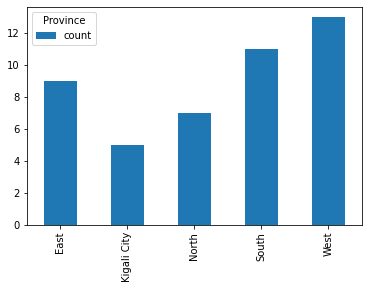

In [215]:
## plot a bar graph if the province
province_tab.plot.bar(align ='center')
plt.show()

### Adding labels 
Here we define our own function to assist in adding labeles to our bar graph. A function is a set of commands put together to perform a given mathematical function. Functions allow you to automate common tasks in a more powerful and general way than copy-and-pasting. Here we define a function that adds labels to a graph. It receives 2 parameters, the graph and the rect

In [216]:
def autolabel(hbar ,rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        check = rect.get_height()
        ## this is for horizontal bar graph
        if check==0.5:
            #get the width of the rectangle
            width = rect.get_width()
            ## add text
            hbar.text( x= rect.get_x() + rect.get_width() / 2, y=rect.get_y() + rect.get_height()/2.,
                    s=('%.0f' % width),ha='center', va='center', color='white')
        ## this is for vertical bar graph
        elif check>0.5:
             #get the height of the rectangle
            height = rect.get_height()
            hbar.text(x=rect.get_x() + rect.get_width() / 2, y=rect.get_y() + rect.get_height()/2.,
                    s='%.0f' % height,ha='center', va='center', color='white')

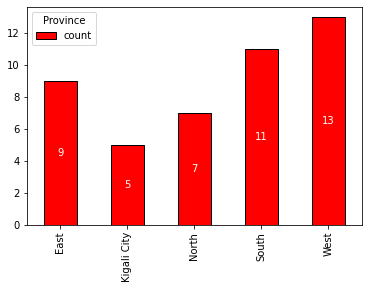

In [217]:
## plot a bar graph if the province
p1 = province_tab.plot.bar(align ='center' , color ='red',edgecolor ='black')
## use our function to add labels
autolabel(p1, p1.patches)
plt.show()

### Mutiple variable bar graph
We use a two-way frequency of 2 variables. Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables give you insight into the relationship between two variables. To create a two way table, pass two variables to the `pd.crosstab()` function instead of one:

In [218]:
# Summary of hospitals in a province that are urban or rural
# Table of province vs. S0_13
prov_S0_13 = pd.crosstab(index=iss_df["facility_identification:province"], 
                           columns=iss_df["facility_identification:S0_13"],
                            rownames=["Province"],
                            colnames=["S0_13"])

prov_S0_13

S0_13,rural,semi-urban,urban
Province,,,
East,7,0,2
Kigali City,0,0,5
North,5,0,2
South,8,1,2
West,10,0,3


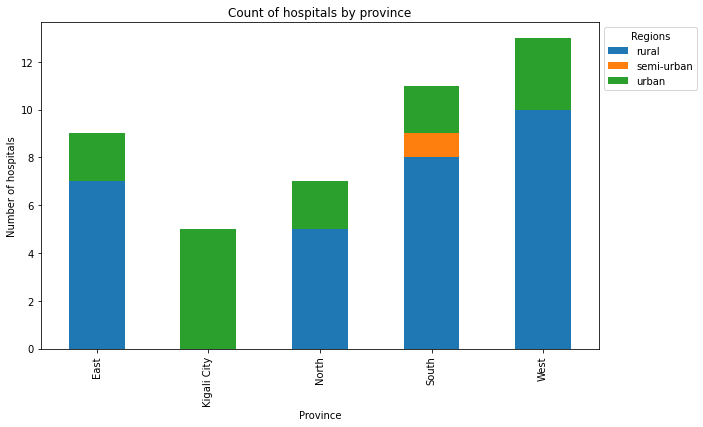

In [219]:
## stacked bar plot of the counts
## how to increase size
bplot = prov_S0_13.plot.bar(stacked=True, figsize=(10, 6))
bplot.set_ylabel('Number of hospitals')
bplot.set_title('Count of hospitals by province')
bplot.legend(title='Regions', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

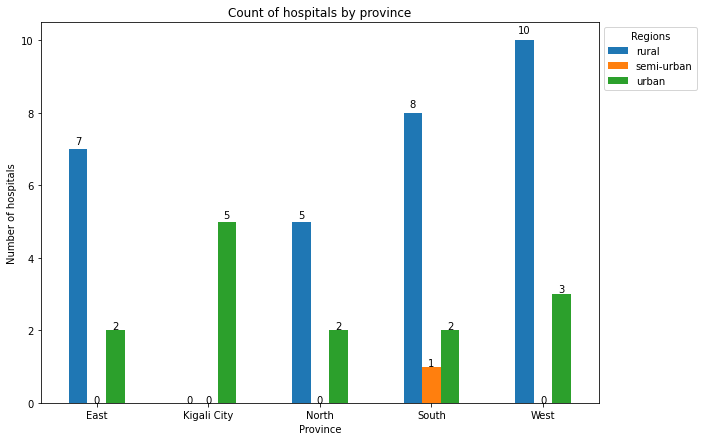

In [220]:
## unstacked bar plot of the counts
bplot2 = prov_S0_13.plot.bar(stacked=False, rot=0 , figsize=(10,7))
bplot2.set_ylabel('Number of hospitals')
bplot2.set_title('Count of hospitals by province')
bplot2.legend(title='Regions', bbox_to_anchor=(1.0, 1), loc='upper left')
## for each of the rectangle on the plot
for p in bplot2.patches:
     #Return the width of the rectangle
    width = p.get_width()
     #Return the height of the rectangle
    height = p.get_height()
    #returns the bottom and left rectangle coordinates
    x, y = p.get_xy() 
    ## adding label to the plot
    bplot2.annotate(text= f'{height}', xy=(x + width/2, y + height*1.02), ha='center')
plt.show()

In [221]:
## combine results from different variables
var1 = pd.crosstab(index=iss_df["monitoring_evaluation:S0_26"],
           columns="count", rownames=[""],colnames=["S0_26"]).apply(lambda r: r/r.sum()*100, axis=0)
var2 = pd.crosstab(index=iss_df["monitoring_evaluation:S0_29"],
           columns="count", rownames=[""],colnames=["S0_29"]).apply(lambda r: r/r.sum()*100, axis=0)
var3 = pd.crosstab(index=iss_df["monitoring_evaluation:S0_32"],
           columns="count", rownames=[""],colnames=["S0_32"]).apply(lambda r: r/r.sum()*100, axis=0)
var4 = pd.crosstab(index=iss_df["monitoring_evaluation1:S0_42"],
           columns="count",  rownames=[""],colnames=["S0_42"]).apply(lambda r: r/r.sum()*100, axis=0)
var5 = pd.crosstab(index=iss_df["monitoring_evaluation1:S0_45"],
           columns="count", rownames=[""],colnames=["S0_45"]).apply(lambda r: r/r.sum()*100, axis=0)

In [222]:
var1.columns.name

'S0_26'

In [223]:
values = [var1.loc['yes','count'],var2.loc['yes','count'],var3.loc['yes','count'],
          var4.loc['yes','count'],var5.loc['yes','count']]
names = [var1.columns.name,var2.columns.name,var3.columns.name,var4.columns.name,var5.columns.name]

df = pd.DataFrame({"varname":names,
                 "values":values},
                 index=[1,2,3,4,5])
df

,varname,values
1,S0_26,86.666667
2,S0_29,93.333333
3,S0_32,62.222222
4,S0_42,86.666667
5,S0_45,62.222222


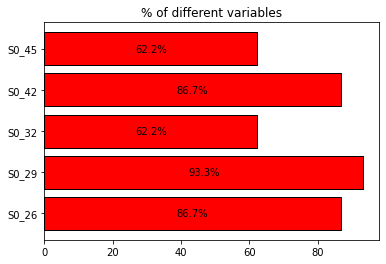

In [224]:
hbar = plt.barh(df['varname'] , df['values'] ,color ='red',edgecolor ='black')
plt.title('% of different variables')
for p in hbar.patches:
    #Return the width of the rectangle
    width = p.get_width()
    ##Return the height of the rectangle
    height = p.get_height()
    #returns the bottom and left rectangle coordinates
    x, y = p.get_xy() 
    plt.annotate(text=('%.1f' % width + '%'), xy=(x + width/2, y + height/2),ha='center',  va='center', color='black')
plt.show()

     Period  Observations            Result
0  2019/oct            10          Approved
1  2019/oct            20          Approved
2  2019/oct            30          Approved
3  2019/oct            40  Under evaluation
4  2019/nov            20  Under evaluation
5  2019/dec            30           Aproved


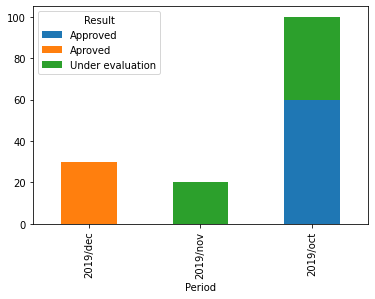

In [225]:
## quick code to plot a variable with numeric
data= [["2019/oct",10,"Approved"],["2019/oct",20,"Approved"],["2019/oct",30,"Approved"],["2019/oct",40,"Under evaluation"],["2019/nov",20,"Under evaluation"],["2019/dec",30,"Aproved"]] 
df = pd.DataFrame(data, columns=['Period', 'Observations', 'Result'])
print(df)
df.groupby(['Period', 'Result'])['Observations'].sum().unstack('Result').plot(kind='bar', stacked=True)
plt.show()